<a href="https://colab.research.google.com/github/AleksLZCR/MAT-421/blob/main/ModuleH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW11 - Aleksandr Cooper

$~$

## 22.4 - Numerical Error and Instability ##
*   As was covered previously, the most common way to solve differential equations is via approximations.
*   An approximation can only be useful if it returns a value within a certian allowed range of error.
*   Accuracy: A scheme's ability to get close to the exact solution as a function of the step size h.
*   Stability: A scheme's ability to keep the error from growing as it integrates further in time. A scheme can only be considered stable if the error does not grow.
*   Python can be used to demonstrate the Accuracy and Stability of various common ODE approximation methods:



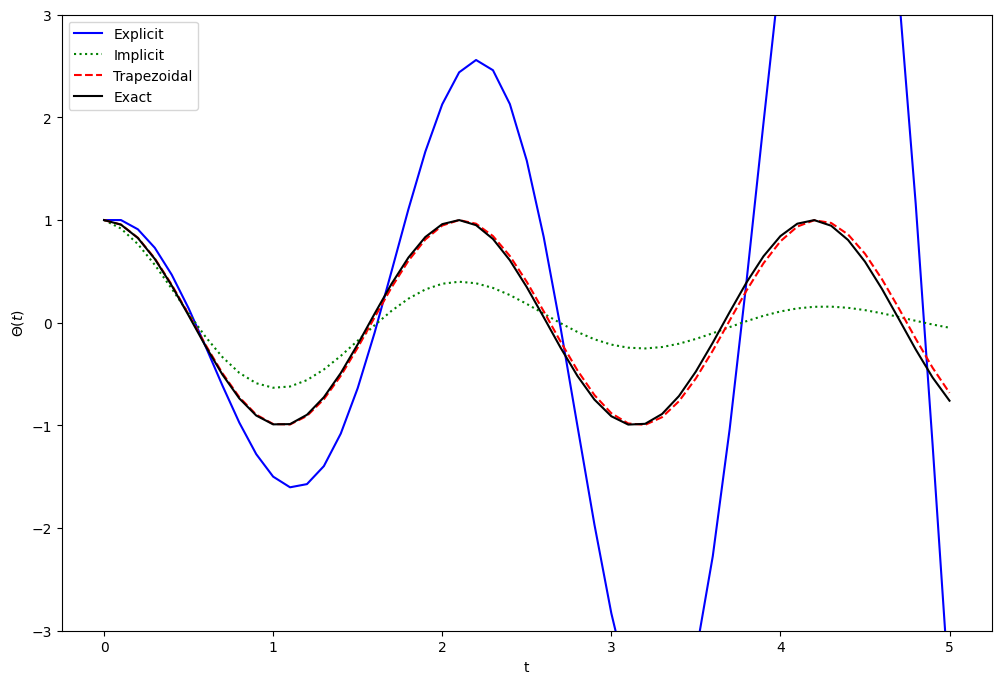

In [3]:
# An example of using the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve a pendulum differential equation over time

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

h = 0.1                   # step size
t = np.arange(0, 5.1, h)  # numerical grid
w = 3                     # pendulum oscillation frequency

s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')  ; plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--') ; plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3]) ; plt.xlabel('t') ; plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()

As we can observe, the both the Euler explicit and implicit are very poor approximations of the differential equation at times greater than 0.5. The trapezoidal method however does approximate the exact value reasonably well with some increasing error over time.

If we increase the step size, we can see that the error in the two Euler methods does decrease substantially, however both are still less useful and become worse over time.

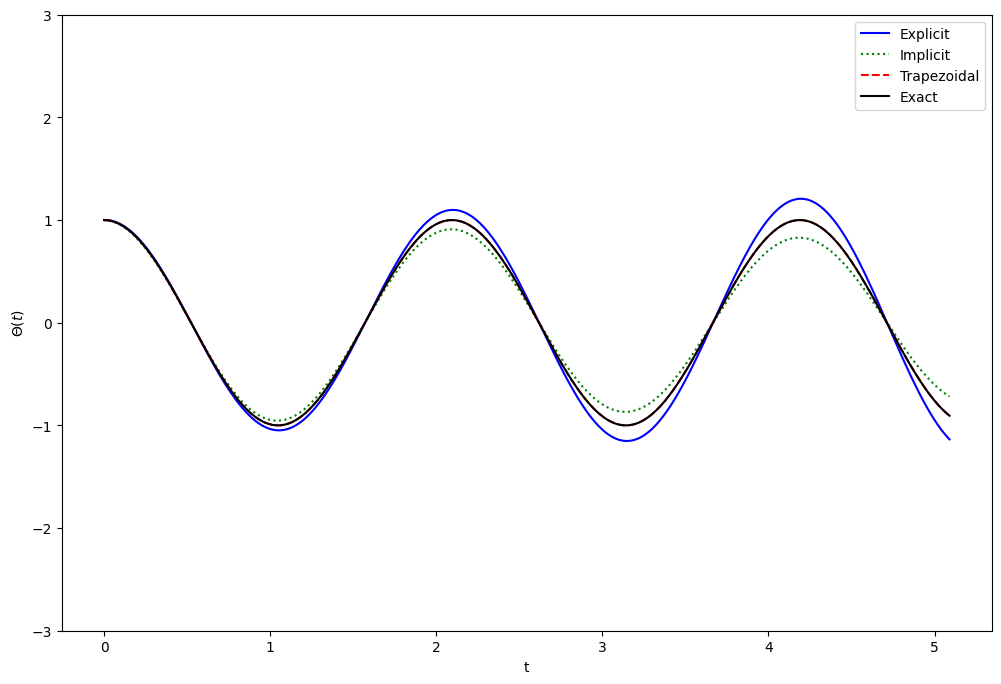

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

h = 0.01                   # step size
t = np.arange(0, 5.1, h)  # numerical grid
w = 3                     # pendulum oscillation frequency

s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')  ; plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--') ; plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3]) ; plt.xlabel('t') ; plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()

$~$

## 22.5 - Predictor-Corrector and Runge Kutta Methods ##
*   Predictor Corrector Methods: A method of improving the approximation accuracy by querying the F function several times at diffferent locations and then using a weighted average of the results to update the state.
*   Predictor: An explicit formula; first estimates the solution at tj+1.
*   Corrector: After the solution S is obtained, the corrector can be applied to improve accuracy.
*   Runge Kutta (RK) Method: One of the popular ways to solve an ODE. RK methods are based on truncated Taylor series to get closer to the exact solution without S^n iterations. They can be computed with several orders and produce results much more accurate than either Euler explicit or Euler implicit methods.

$~$

## 22.6 - Python ODE Solvers ##
*   One of the perks of living in the modern era is that math that took very educated people a very long time to come up with can now be done in seconds without any human computation. Python contains many ways to solve ODEs by importing the scipy library.
*   Examples of this are shown below:


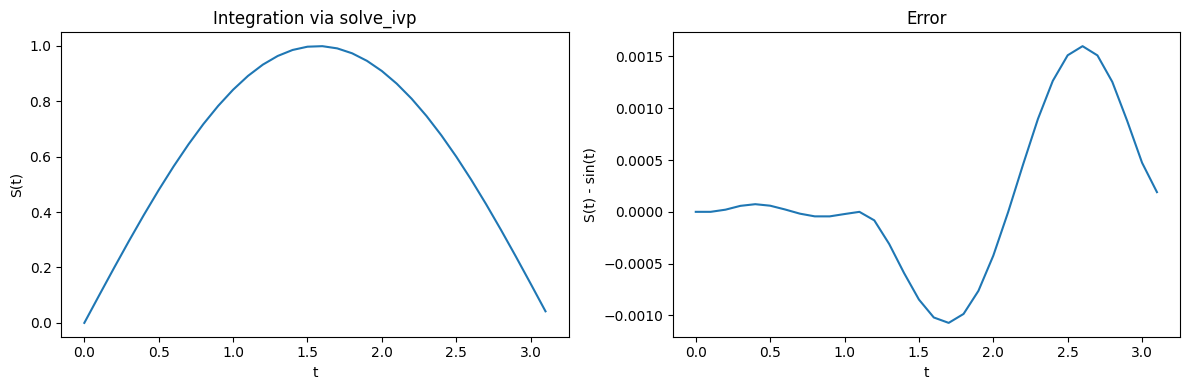

In [12]:
# Examples of using the scipy libary to solve ODEs in Python
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Function Definition
F = lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)

# Use scipy function to solve ODE
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

# Plot Result
plt.figure(figsize = (12, 4))
p_sln = plt.subplot(121)
p_sln.set_title("Integration via solve_ivp")
plt.plot(sol.t, sol.y[0])
plt.xlabel('t') ; plt.ylabel('S(t)')

# Plot Error
p_error = plt.subplot(122)
p_error.set_title("Error")
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t') ; plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The error when using solve_ivp for this function is incredibly minimal, less than 1% at maximum.

rtol and atol can also be used to control the relative and absolute tolerances:

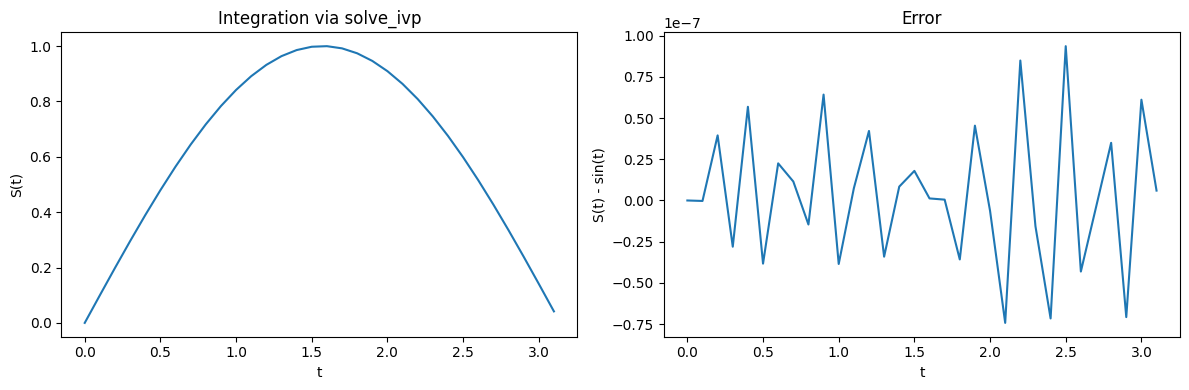

In [9]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

# Plot Result
plt.figure(figsize = (12, 4))
p_sln = plt.subplot(121)
p_sln.set_title("Integration via solve_ivp")
plt.plot(sol.t, sol.y[0])
plt.xlabel('t') ; plt.ylabel('S(t)')

# Plot Error
p_error = plt.subplot(122)
p_error.set_title("Error")
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t') ; plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()